# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

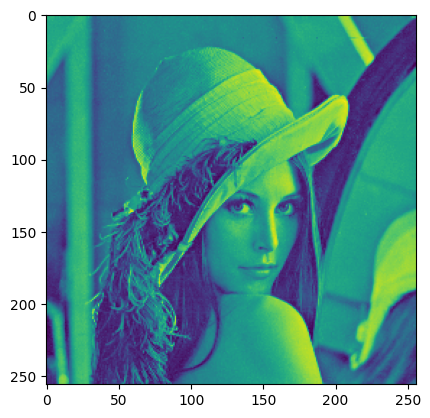

In [1]:
import numpy
import matplotlib.pyplot as plt
lena=plt.imread("data/lena.png")
plt.imshow(lena)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [2]:
 n = (3 - 1) // 2
 for q in numpy.ndindex(3, 3):
    print(q[0] - n,q[1]-n)

-1 -1
-1 0
-1 1
0 -1
0 0
0 1
1 -1
1 0
1 1


In [3]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape[1]-2*n,img.shape[0]-2*n):
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            x=q[1]+p[1]
            y=q[0]+p[0]
            neighborhood_sum = neighborhood_sum + img[x,y]
        mean = (1/(size*size)*neighborhood_sum)
        result[p[1]+n,p[0]+n]=mean
    
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

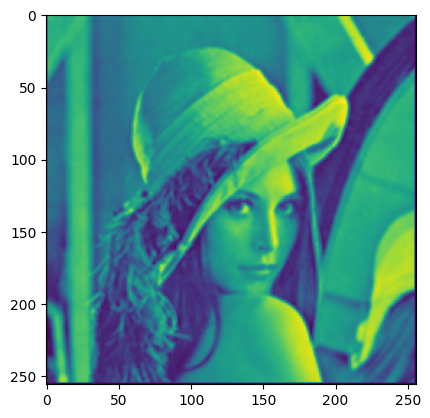

In [4]:
lena5=meanfilter(lena,5)
plt.imshow(meanfilter(lena,3))


**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [5]:
lena_true=plt.imread("data/lena_meanfilter5.png")
assert numpy.allclose(lena5, lena_true, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [8]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape[1]-2*n,img.shape[0]-2*n):
        list1=[]
        for q in numpy.ndindex(size, size):
            x=q[1]+p[1]
            y=q[0]+p[0]
            list1.append(img[x,y])
            sortiert=numpy.sort(list1)
        median= sortiert[(len(sortiert))//2]
        result[p[1]+n,p[0]+n]=median
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

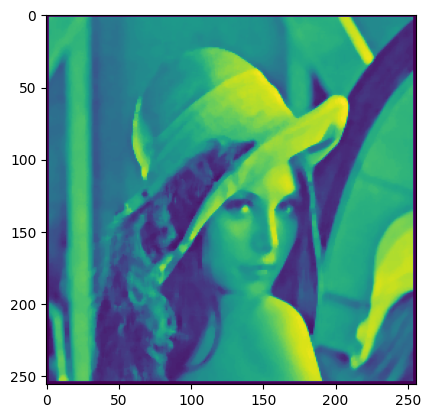

In [10]:
lena_median=medianfilter(lena,5)
plt.imshow(lena_median)

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [11]:
lena_true2=plt.imread("data/lena_medianfilter5.png")
assert numpy.allclose(lena_median, lena_true2, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [12]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

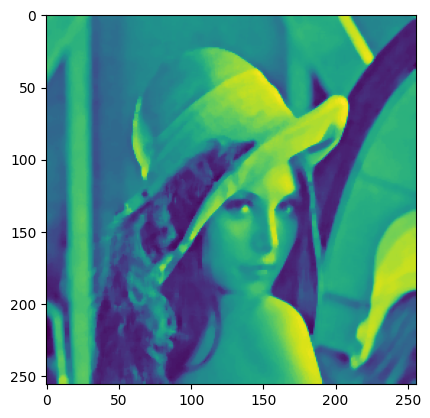

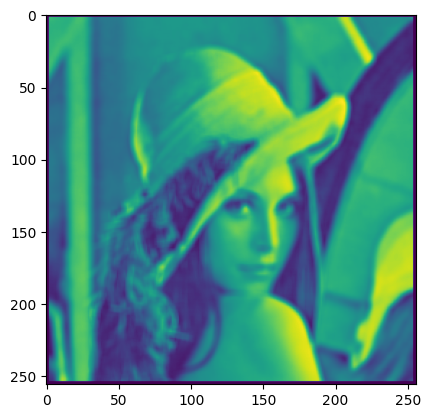

In [21]:
lena1=scipy.ndimage.median_filter(lena,5)
plt.figure()
plt.imshow(lena1)
plt.figure()
plt.imshow(lena5)

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

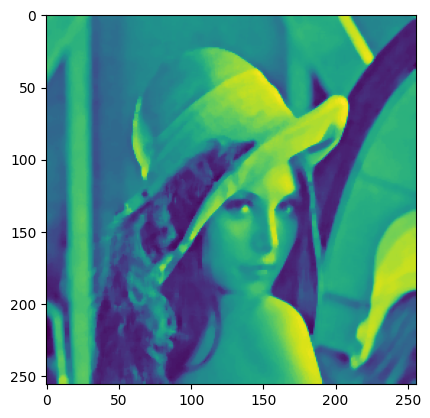

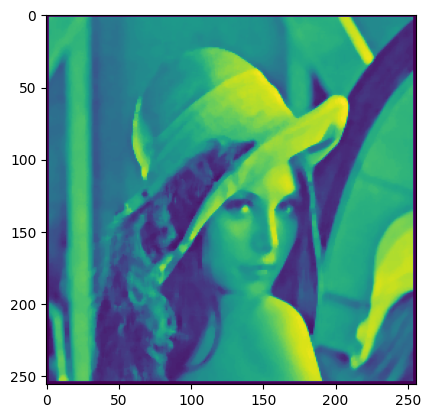

In [24]:
lena2=scipy.ndimage.median_filter(lena, 5)
plt.figure()
plt.imshow(lena2)
plt.figure()
plt.imshow(lena_median)

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

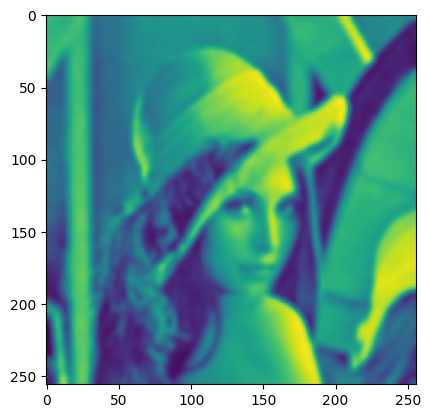

In [25]:
lena3=scipy.ndimage.gaussian_filter(lena, 2)
plt.imshow(lena3)

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

own filters are more blurry

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [26]:
def fastfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape[1]-2*n,img.shape[0]-2*n):
        i0=p[1]
        i1=p[1]+size
        j0=p[0]
        j1=p[0]+size
        slice=img[i0:i1,j0:j1]
        flat=slice.flatten()
        sortiert=numpy.sort(flat)
        median= sortiert[(len(sortiert))//2]
        result[p[1]+n,p[0]+n]=median
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

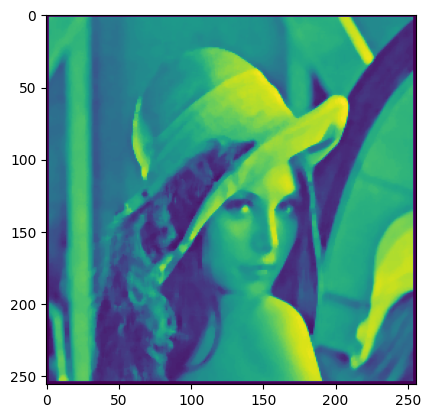

In [28]:
lenafast=fastfilter(lena,5)
plt.imshow(lenafast)

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

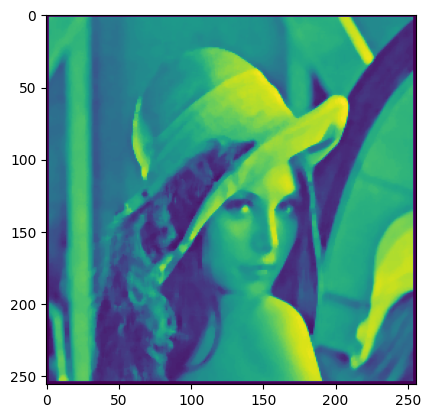

In [30]:
plt.imshow(lena_median)
assert numpy.allclose(lena_median, lenafast, atol=1/255)

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [33]:
%timeit fastfilter(lena,9)
%timeit medianfilter(lena,5)

308 ms ± 19.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.7 s ± 83.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: